# Least square estimation of sinusoid parameters

The signal paramters for a function
$$x = o + g t + \hat{x} \sin \left( \omega t + \phi \right)$$
for a known frequency $\omega$ at discrete from a given series of data points $x_i$ sampled at discrete time intervals $t_i$ will be estimated.

The sunusoidal function can be expressed as
$$ \hat{x} \sin \left( \omega t + \phi \right) = a \sin \left( \omega t \right) + b \cos \left( \omega t \right) $$
with
$$ \phi = \text{arctan2} \left( b, a \right) \quad \text{and} \quad \hat{x} = \sqrt{a^2 + b^2} \text{.}$$

Therefore the problem can be rewritten as
$$x = c_0 + c_1 t + c_2 \sin \left( \omega t \right) + c_3 \cos \left( \omega t \right) \text{.}$$
Only the parameters $c_i$ have to be estimate, which means the problem can be solved using a linear least square.

## Linear least square

For a sinusoidal signal described above sampled at discreet time intervals the error term is
$$e_i = c_0 + c_1 t_i + c_2 \sin \left( \omega t_i \right) + c_3 \cos \left( \omega t_i \right) - x_i \text{.}$$

For the set of measured values the error term can be expressed in matrix notation
$$\mathbf{e} = \mathbf{V} \mathbf{c} - \mathbf{x}$$
with
$$\mathbf{e} = \begin{bmatrix}
    e_1 \\
    e_2 \\
    \vdots \\
    e_n \\
\end{bmatrix} \text{,} \quad
\mathbf{V} = \begin{bmatrix}
    1 & t_1 & \sin \left( \omega t_1 \right) & \cos \left( \omega t_1 \right) \\
    1 & t_2 & \sin \left( \omega t_2 \right) & \cos \left( \omega t_2 \right) \\
    \vdots & \vdots & \vdots & \vdots \\
    1 & t_n & \sin \left( \omega t_n \right) & \cos \left( \omega t_n \right) \\
\end{bmatrix} \text{,} \quad
\mathbf{c} = \begin{bmatrix}
    c_1 \\
    c_2 \\
    c_3 \\
    c_4 \\
\end{bmatrix} \text{,} \quad
\mathbf{x} = \begin{bmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n \\
\end{bmatrix} \text{.}$$

The cost function of the least square algorithm is the squared error term (${e_i}^2$). In matrix notation the error term
\begin{equation}
\begin{split}
J = \mathbf{e}^\text{T} \mathbf{e} & = \left( \mathbf{c}^\text{T} \mathbf{V}^\text{T} - \mathbf{x}^\text{T} \right) \left( \mathbf{V} \mathbf{c} - \mathbf{x} \right) \\
& = \mathbf{c}^\text{T} \mathbf{V}^\text{T} \mathbf{V} \mathbf{c} - \mathbf{c}^\text{T} \mathbf{V}^\text{T}  \mathbf{x} -  \mathbf{x}^\text{T} \mathbf{V} \mathbf{c} \\
\end{split}
\end{equation}
has to be minimized. To find the minimum of $J \left( \mathbf{c} \right)$
$$ \frac{\text{d} J}{\text{d} \mathbf{c}} \stackrel{!}{=} 0 $$
is solved for $\mathbf{c}$.

The following equation has to be solved for $\mathbf{c}$:
$$\begin{split}
& \frac{\text{d} J}{\text{d} \mathbf{c}} = 0 \\
\Leftrightarrow \ &
    \underbrace{\frac{\text{d} \left( \mathbf{c}^\text{T} \mathbf{V}^\text{T} \mathbf{V} \mathbf{c} \right)}{\text{d} \mathbf{c}}}_{= \mathbf{V}^\text{T} \mathbf{V} \mathbf{c} + \mathbf{c}^\text{T} \mathbf{V}^\text{T} \mathbf{V}} -
    \underbrace{\frac{\mathbf{c}^\text{T} \mathbf{V}^\text{T}  \mathbf{x}}{\text{d} \mathbf{c}}}_{= \mathbf{V}^\text{T}  \mathbf{x}} - 
    \underbrace{\frac{\mathbf{x}^\text{T} \mathbf{V} \mathbf{c}}{\text{d} \mathbf{c}}}_{= \mathbf{x}^\text{T} \mathbf{V}}
    = 0 \\
\Leftrightarrow \ & \mathbf{V}^\text{T} \mathbf{V} \mathbf{c} + \mathbf{c}^\text{T} \mathbf{V}^\text{T} \mathbf{V} - \mathbf{V}^\text{T}  \mathbf{x} - \mathbf{x}^\text{T} \mathbf{V} = 0 \\
\Leftrightarrow \ & 2 \mathbf{V}^\text{T} \mathbf{V} \mathbf{c} - 2 \mathbf{V}^\text{T}  \mathbf{x} = 0 \\
\Leftrightarrow \ & \mathbf{V}^\text{T} \mathbf{V} \mathbf{c} = \mathbf{V}^\text{T}  \mathbf{x} \\
\Leftrightarrow \ & \mathbf{c} = \left( \mathbf{V}^\text{T} \mathbf{V} \right)^{-1} \mathbf{V}^\text{T}  \mathbf{x} \\
\end{split}$$

## Python implementation of sine parameter estimator

The following python function implements a sine parameter estimator.

The frequency ($\omega$), the signal data ($x$) and the time vector ($t$) are passed to the function and the signal parameters offset ($o$), gradiant ($g$), amplitud ($\hat{x}$) and phase ($\phi$) are returned.

In [1]:
import numpy as np

def estimate_sine(omega, data, t):
    func_mtrx_transp = np.array([
            len(data) * [1.],
            t,
            np.sin(omega * t),
            np.cos(omega * t),
        ])
    res = np.linalg.solve(np.dot(func_mtrx_transp, func_mtrx_transp.T),
                          np.dot(func_mtrx_transp, np.array([data]).T))
    amp = np.sqrt(res[2][0]**2. + res[3][0]**2.)
    phase = np.arctan2(res[3][0], res[2][0])
    return res[0][0], res[1][0], amp, phase

To test the function 'estimate_sine' a test signal is created and the paramters are estimated.

            Original Estimated     Error
Offset:     7.500000  7.469401  0.030599
Gradient:   2.250000  2.184384  0.065616
Amplitude: 12.250000 12.312801 -0.062801
Phase:      0.628319  0.629675 -0.001356


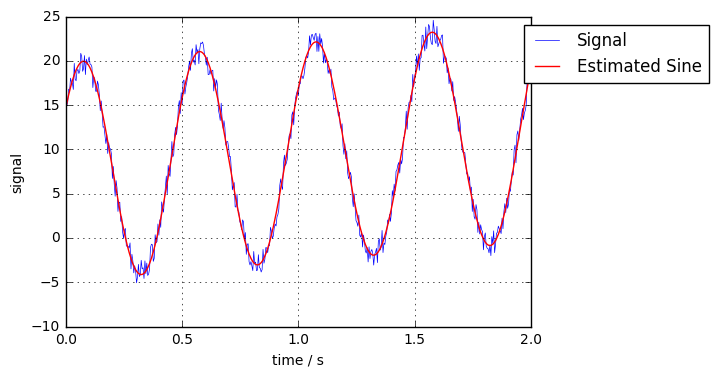

In [2]:
import matplotlib.pyplot as plt

# Signal parameters
offset     = 7.5
gradient   = 2.25
omega      = 2. * np.pi * 2.
sine_amp   = 12.25
sine_phase = np.pi * 0.2
noise_amp  = 1.5

# Create test signal
t = np.arange(0., 2.0, 0.004)
x = offset + gradient * t + sine_amp * np.sin(omega * t + sine_phase) \
    + noise_amp * 2 * (np.random.random(len(t)) - 0.5)

# Estimate signal parameters
est_offset, est_grad, est_amp, est_phase = estimate_sine(omega, x, t)
x_est = est_offset + est_grad * t + est_amp * np.sin(omega * t + est_phase)

# Print results
print("            Original Estimated     Error")
print("Offset:    {orig_offs:>9f} {est_offs:>9f} {error:>9f}".format(
        orig_offs=offset, est_offs=est_offset, error=offset-est_offset))
print("Gradient:  {orig_grad:>9f} {est_grad:>9f} {error:>9f}".format(
        orig_grad=gradient, est_grad=est_grad, error=gradient-est_grad))
print("Amplitude: {orig_amp:>9f} {est_amp:>9f} {error:>9f}".format(
        orig_amp=sine_amp, est_amp=est_amp, error=sine_amp-est_amp))
print("Phase:     {orig_phase:>9f} {est_phase:>9f} {error:>9f}".format(
        orig_phase=sine_phase, est_phase=est_phase, error=sine_phase-est_phase))

# Plot results
plt.plot(t, x, 'b', linewidth=0.5, label="Signal")
plt.plot(t, x_est, 'r', linewidth=1.0, label="Estimated Sine")
plt.xlabel("time / s")
plt.ylabel("signal")
plt.legend(bbox_to_anchor=(1.4, 1.0))
plt.grid(True)
plt.show()